<a href="https://colab.research.google.com/github/tahirasml/TalhaLqp/blob/main/TalhaProgrammingCA02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Acquisition (data_acquisition.ipynb)**

In this phase, the objective is to retrieve data from the OpenWeatherMap API for a given city (in our case, **Ireland**) and save it in a CSV format.

**Steps**:

1.   Import necessary libraries: **requests** for API calls and **pandas** for data manipulation.
2.   Define the **api_key** and target **city**.
3.   Build the **base_url** to make the API call.
4.   Send the GET request to the OpenWeatherMap API to fetch the current weather data.
5.   Convert the API response to a JSON format. calls and pandas for data manipulation.
6.   Extract the 'main' section from the JSON data, which contains weather details.
7.   Convert the extracted data into a Pandas DataFrame.
8.   Save the DataFrame to a **weather_data.csv** file for further processing.






In [5]:
import requests
import pandas as pd

api_key = "0b5e97d969ebe3255a17d2af74331092"
city = "Ireland"
base_url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={api_key}"

response = requests.get(base_url)

# Convert the response to JSON
data = response.json()

# Extract the main weather data
weather_data = data['main']

# Convert the weather data to a pandas DataFrame and save it to a CSV file
df = pd.DataFrame(weather_data, index=[0])
df.to_csv('weather_data.csv', index=False)



**Data Pre-processing (data_preprocessing.ipynb)**

In this phase, the raw data acquired from the API is cleaned and transformed to make it suitable for analysis.

**Steps**:


1.   Load the raw data from **weather_data.csv** using Pandas.

2.   Check and handle missing values, if any. In our example, we simply drop rows with any missing values.
3.   Convert the temperature data from Kelvin to Celsius.
4.   Save the cleaned and transformed data to **preprocessed_weather_data.csv**.


In [6]:
import pandas as pd

# Load the data from the CSV file
df = pd.read_csv('weather_data.csv')

# Handle missing values (if any)
df = df.dropna()

# Convert temperature from Kelvin to Celsius
df['temp'] = df['temp'] - 273.15

# Save the preprocessed data to a new CSV file
df.to_csv('preprocessed_weather_data.csv', index=False)


**Data Analysis (data_analysis.ipynb)**

In this phase, we perform exploratory data analysis (EDA) to understand our dataset's characteristics and derive insights.

**Steps**:



1.   Load the preprocessed data from preprocessed_weather_data.csv using Pandas.
2.   Calculate basic statistical measures for the temperature:
        *   Mean: Average temperature.
        *   Median: Middle value in the sorted list of temperatures.
        *   Standard Deviation: Measures the amount of variation or dispersion of the temperature set.

3.   Print out the statistical measures.
4.   Visualize the temperature distribution using a histogram. This gives an idea about the frequency distribution of the temperature values.




Mean temperature: 15.62 °C
Median temperature: 15.62 °C
Standard deviation of temperature: nan °C


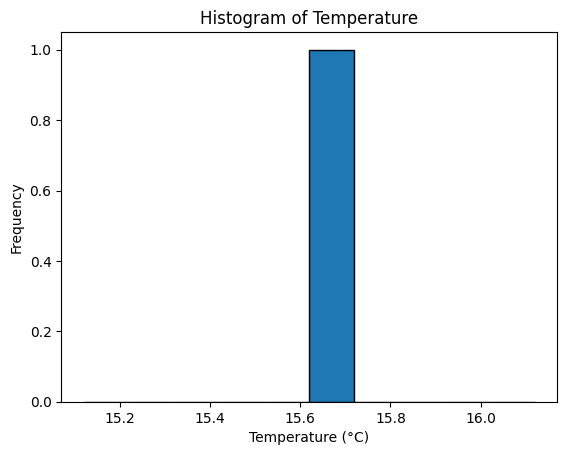

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the preprocessed data from the CSV file
df = pd.read_csv('preprocessed_weather_data.csv')

# Calculate basic statistics for the temperature
mean_temp = df['temp'].mean()
median_temp = df['temp'].median()
std_dev_temp = df['temp'].std()

# Print the statistics
print(f'Mean temperature: {mean_temp:.2f} °C')
print(f'Median temperature: {median_temp:.2f} °C')
print(f'Standard deviation of temperature: {std_dev_temp:.2f} °C')

# Plot a histogram of the temperature
plt.hist(df['temp'], bins=10, edgecolor='black')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.title('Histogram of Temperature')
plt.show()
